# **Predicting Employee Attrition: Uncovering Key Factors**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/IBM_logo.svg/1600px-IBM_logo.svg.png?20220104162604"
     align="right" 
     width="200" />


**Authored By: Alex Chou, Rubin Fergerson, Suniul Karim, and Jay Pantha**

The IBM HR Analytics Employee Attrition & Performance dataset offers a valuable opportunity to investigate some of the key factors that contribute to employee attrition. With the ability to explore various features, such as education, job role, and satisfaction levels, in our project we aim to provide insights into the relationship between different variables and their impact on employee attrition. 

Using machine learning models such as Random Forest, Logistic Regression, and Neural Networks, we plan to identify the most significant factors influencing attrition. By leveraging ensemble methods such as Gradient Boosting Trees, the team aims to achieve better prediction performance. In this project, the team seeks to assist HR departments and management in making data-driven decisions and implementing effective strategies to improve employee retention and reduce turnover costs. However, there are several challenges, such as dealing with missing or inconsistent data points, handling class imbalance in the dataset, and selecting appropriate models and tuning hyperparameters. Despite these challenges, our team is confident in our ability to both derive meaningful insights into the factors contributing to employee attrition and predict the likelihood of voluntary resignation.

<img src="https://www.urban.org/sites/default/files/2022-03/jobs-feature-header-1700x700_0.png"
     align="center" 
     width="1000" />


# Import Dependencies

In [49]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data Cleaning and Pre-Processing

Data cleaning is an essential step to ensure that the dataset is accurate and reliable. In this project, we will be conducting several cleaning techniques to enhance the quality of the IBM HR Analytics Employee Attrition & Performance dataset. 

One way that we will be cleaning the data is by converting data into appropriate types, ensuring that each feature has the correct data type to avoid errors during analysis. We will also be dropping duplicate rows and columns, ensuring that the data is not skewed by unnecessary or redundant data. Additionally, we will implement *ordinal encoding* to convert categorical data into numerical data. This technique will enable us to conduct meaningful analyses by assigning values to categorical data, which helps preserve the information's integrity. Overall, these cleaning techniques will enable us to perform reliable analysis, identify trends, and provide valuable insights into employee attrition.

In [50]:
# Utilizing pandas' read_csv function, read in the csv file containing our data into a Pandas dataframe
ibm_df = pd.read_csv('IBM HR Data new.csv')

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (5,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
# Preview the dataframe
ibm_df

Age 
 Attrition 
 BusinessTravel 
 DailyRate 
 Department 
 DistanceFromHome 
 Education 
 EducationField 
 EmployeeCount 
 EmployeeNumber 
 ... 
 StandardHours 
 StockOptionLevel 
 TotalWorkingYears 
 TrainingTimesLastYear 
 WorkLifeBalance 
 YearsAtCompany 
 YearsInCurrentRole 
 YearsSinceLastPromotion 
 YearsWithCurrManager 
 Employee Source 
 
 
 
 
 0 
 41.0 
 Voluntary Resignation 
 Travel_Rarely 
 1102.0 
 Sales 
 1 
 2.0 
 Life Sciences 
 1 
 1 
 ... 
 80.0 
 0.0 
 8.0 
 0.0 
 1.0 
 6.0 
 4.0 
 0.0 
 5.0 
 Referral 
 
 
 1 
 41.0 
 Voluntary Resignation 
 Travel_Rarely 
 1102.0 
 Sales 
 1 
 2.0 
 Life Sciences 
 1 
 1 
 ... 
 80.0 
 0.0 
 8.0 
 0.0 
 1.0 
 6.0 
 4.0 
 0.0 
 5.0 
 Referral 
 
 
 2 
 41.0 
 Voluntary Resignation 
 Travel_Rarely 
 1102.0 
 Sales 
 1 
 2.0 
 Life Sciences 
 1 
 7 
 ... 
 80.0 
 0.0 
 8.0 
 0.0 
 1.0 
 6.0 
 4.0 
 0.0 
 5.0 
 Referral 
 
 
 3 
 41.0 
 Voluntary Resignation 
 Travel_Rarely 
 1102.0 
 Sales 
 1 
 2.0 
 Life Sciences 
 1 
 8 
 ... 
 80.0 
 0.0 
 8.0 
 0.0 
 1.0 
 6.0 
 4.0 
 0.0 
 5.0 
 Referral 
 
 
 4 
 41.0 
 Voluntary Resignation 
 Travel_Rarely 
 1102.0 
 Sales 
 1 
 2.0 
 Life Sciences 
 1 
 9 
 ... 
 80.0 
 0.0 
 8.0 
 0.0 
 1.0 
 6.0 
 4.0 
 0.0 
 5.0 
 Referral 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 23431 
 60.0 
 Current employee 
 Travel_Rarely 
 370.0 
 Research & Development 
 1.0 
 4.0 
 Medical 
 1 
 19344 
 ... 
 80.0 
 1.0 
 20.0 
 2.0 
 3.0 
 20.0 
 7.0 
 2.0 
 13.0 
 Company Website 
 
 
 23432 
 60.0 
 Current employee 
 Travel_Rarely 
 370.0 
 Research & Development 
 1.0 
 4.0 
 Life Sciences 
 1 
 19345 
 ... 
 80.0 
 1.0 
 19.0 
 2.0 
 4.0 
 1.0 
 0.0 
 0.0 
 0.0 
 Company Website 
 
 
 23433 
 NaN 
 Voluntary Resignation 
 Travel_Frequently 
 1009.0 
 Research & Development 
 1.0 
 3.0 
 Life Sciences 
 1 
 16794 
 ... 
 80.0 
 2.0 
 4.0 
 2.0 
 2.0 
 2.0 
 1.0 
 2.0 
 2.0 
 Adzuna 
 
 
 23434 
 NaN 
 Current employee 
 Travel_Rarely 
 1354.0 
 Research & Development 
 5.0 
 3.0 
 Medical 
 1 
 1956 
 ... 
 80.0 
 0.0 
 14.0 
 6.0 
 3.0 
 11.0 
 10.0 
 5.0 
 8.0 
 Indeed 
 
 
 23435 
 NaN 
 Current employee 
 Non-Travel 
 1142.0 
 Research & Development 
 8.0 
 2.0 
 Life Sciences 
 1 
 17587 
 ... 
 80.0 
 0.0 
 8.0 
 2.0 
 3.0 
 2.0 
 2.0 
 2.0 
 2.0 
 Recruit.net 
 
 
 
 23436 rows × 37 columns

In [52]:
# Print out a summary of our dataframe
ibm_df.info()
# ibm_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  object 
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  object 
 9   EmployeeNumber            23435 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  object 
 14  JobInv

In [53]:
# count number of rows with any null values
num_null_rows = ibm_df.isnull().any(axis=1).sum()

# print result
print(f'Number of rows with any null values: {num_null_rows}')

Number of rows with any null values: 232


In [54]:
# As there are only about 200 rows with null vals out of 23436 entries, we can drop them
ibm_df = ibm_df.dropna()

# Drop duplicate rows
ibm_df = ibm_df.drop_duplicates()

Five columns are being removed from the dataset - StandardHours is being removed because all employees work the same standard hours (80). Employee Number, Employee Source, and Application ID are irrelevant to the analysis. Employee Count is also being dropped because it will not be used in the analysis.

In [55]:
ibm_df = ibm_df.drop(['StandardHours', 'EmployeeNumber', 'Employee Source', 'Application ID','EmployeeCount'], axis=1)

In [56]:
# Check which columns have cell values of "Test" or some question marks ???, then remove those rows
print(f'Num rows before removing test/? cells: {len(ibm_df)}')
      
ibm_df = ibm_df.loc[~ibm_df.apply(lambda x: x.astype(str).str.lower().str.contains('test') \
                                            | x.astype(str).str.contains('\?', regex=False)).any(axis=1)]
print(f'Num rows after removing test/? cells: {len(ibm_df)}')

Num rows before removing test/? cells: 23190
Num rows after removing test/? cells: 23189


We believe yearly income is more intuitive than monthly income to most people. We'd like to add a 'YearlyIncome' column to reflect this.

In [57]:
ibm_df['YearlyIncome'] = ibm_df['MonthlyIncome'].astype(int).apply(lambda x: x * 12)
ibm_df['YearlyIncome']

0 71916
1 71916
2 71916
3 71916
4 71916
 ... 
23428 130596
23429 130596
23430 130596
23431 130596
23432 130596
Name: YearlyIncome, Length: 23189, dtype: int64

In [58]:
print("Min and Max Monthly incomes ($): ", min(ibm_df['MonthlyIncome'].astype(int)), 
      ',',max(ibm_df['MonthlyIncome'].astype(int)),'\n',
      "Min and Max Yearly incomes ($): ",  min(ibm_df['YearlyIncome']), ',', max(ibm_df['YearlyIncome']))

Min and Max Monthly incomes ($):  1009 , 19999 
 Min and Max Yearly incomes ($):  12108 , 239988


In [59]:
# Cast columns that should only have integer values into integers
cols = ['PercentSalaryHike','JobSatisfaction','YearlyIncome','HourlyRate','DistanceFromHome','MonthlyIncome']
for col in cols:
    ibm_df[col] = ibm_df[col].astype(int)

Some columns may be irrelevant to our analysis, specifically those with no distinct values.

In [60]:
# drop columns where all values are 1
cols_to_drop = []
for col in ibm_df.columns:
    if (ibm_df[col] == 1).all() and ibm_df[col].sum() == len(ibm_df):
        cols_to_drop.append(col)
        print(f'column: {col} dropped')

ibm_df = ibm_df.drop(cols_to_drop, axis=1)
        

In [61]:
# percentage of nulls in the entire dataset
ibm_df.isna().sum().sum()/len(ibm_df)

0.0

In order to enhance readability, we will utilize underscores (_) as opposed to spaces when defining column names within our notebook.

In [62]:
ibm_df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in understanding the dataset's characteristics, identifying patterns, and forming hypotheses. In this project, we will conduct EDA to gain insights into the IBM HR Analytics Employee Attrition & Performance dataset. We will start by analyzing the data's descriptive statistics, such as mean, standard deviation, and quartiles, to understand the data's central tendency and variability. Next, we will create visualizations, such as scatter plots, histograms, and box plots, to explore the data's distribution and relationships between variables. We will also use correlation analysis to examine the strength and direction of the relationship between variables. Furthermore, we will explore the impact of individual features on employee attrition and investigate potential interactions between variables. This approach will enable us to identify key variables that significantly contribute to employee attrition, providing insights for HR departments and management to make data-driven decisions. Overall, conducting EDA will enable us to gain a deeper understanding of the dataset, explore relationships between variables, and identify potential factors contributing to employee attrition.

<img src="https://production-tcf.imgix.net/app/uploads/2019/03/02105023/GettyImages-1089753614.jpg?auto=format%2Ccompress&q=80&fit=crop&w=905&h=620&dpr=2" 
     width="1000" />

## Descriptive Statistics

The main characteristics of a dataset can be summarized and described using descriptive statistics, which are statistical methods. They give us access to information on the underlying distributions, relationships, and patterns of the data, which can be essential for comprehending the dataset and directing additional study. Essentially, descriptive statistics lay the groundwork for further analysis and modeling by assisting in the identification of significant data properties.

In [63]:
# mean, std, quartiles
ibm_df.describe()

Age 
 DailyRate 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 HourlyRate 
 JobInvolvement 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 ... 
 RelationshipSatisfaction 
 StockOptionLevel 
 TotalWorkingYears 
 TrainingTimesLastYear 
 WorkLifeBalance 
 YearsAtCompany 
 YearsInCurrentRole 
 YearsSinceLastPromotion 
 YearsWithCurrManager 
 YearlyIncome 
 
 
 
 
 count 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 ... 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 23189.000000 
 
 
 mean 
 36.922420 
 802.216439 
 9.188667 
 2.908707 
 2.719953 
 65.856441 
 2.730562 
 2.065376 
 2.727759 
 6507.899349 
 ... 
 2.713528 
 0.794428 
 11.268834 
 2.799000 
 2.761697 
 7.017120 
 4.230627 
 2.182242 
 4.130579 
 78094.792186 
 
 
 std 
 9.116158 
 403.190403 
 8.098522 
 1.024912 
 1.094889 
 20.334788 
 0.710106 
 1.105971 
 1.101467 
 4706.471063 
 ... 
 1.080748 
 0.850703 
 7.765706 
 1.289849 
 0.705310 
 6.138187 
 3.627033 
 3.215815 
 3.572016 
 56477.652759 
 
 
 min 
 18.000000 
 102.000000 
 1.000000 
 1.000000 
 1.000000 
 30.000000 
 1.000000 
 1.000000 
 1.000000 
 1009.000000 
 ... 
 1.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 12108.000000 
 
 
 25% 
 30.000000 
 465.000000 
 2.000000 
 2.000000 
 2.000000 
 48.000000 
 2.000000 
 1.000000 
 2.000000 
 2911.000000 
 ... 
 2.000000 
 0.000000 
 6.000000 
 2.000000 
 2.000000 
 3.000000 
 2.000000 
 0.000000 
 2.000000 
 34932.000000 
 
 
 50% 
 36.000000 
 802.000000 
 7.000000 
 3.000000 
 3.000000 
 66.000000 
 3.000000 
 2.000000 
 3.000000 
 4936.000000 
 ... 
 3.000000 
 1.000000 
 10.000000 
 3.000000 
 3.000000 
 5.000000 
 3.000000 
 1.000000 
 3.000000 
 59232.000000 
 
 
 75% 
 43.000000 
 1157.000000 
 14.000000 
 4.000000 
 4.000000 
 83.000000 
 3.000000 
 3.000000 
 4.000000 
 8380.000000 
 ... 
 4.000000 
 1.000000 
 15.000000 
 3.000000 
 3.000000 
 10.000000 
 7.000000 
 3.000000 
 7.000000 
 100560.000000 
 
 
 max 
 60.000000 
 1499.000000 
 29.000000 
 5.000000 
 4.000000 
 100.000000 
 4.000000 
 5.000000 
 4.000000 
 19999.000000 
 ... 
 4.000000 
 3.000000 
 40.000000 
 6.000000 
 4.000000 
 40.000000 
 18.000000 
 15.000000 
 17.000000 
 239988.000000 
 
 
 
 8 rows × 24 columns

## Correlation Matrix


Based on our correlation matrix, we can determine variables are positively or negatively correlated with each other to help us choose the features for our modeling. 

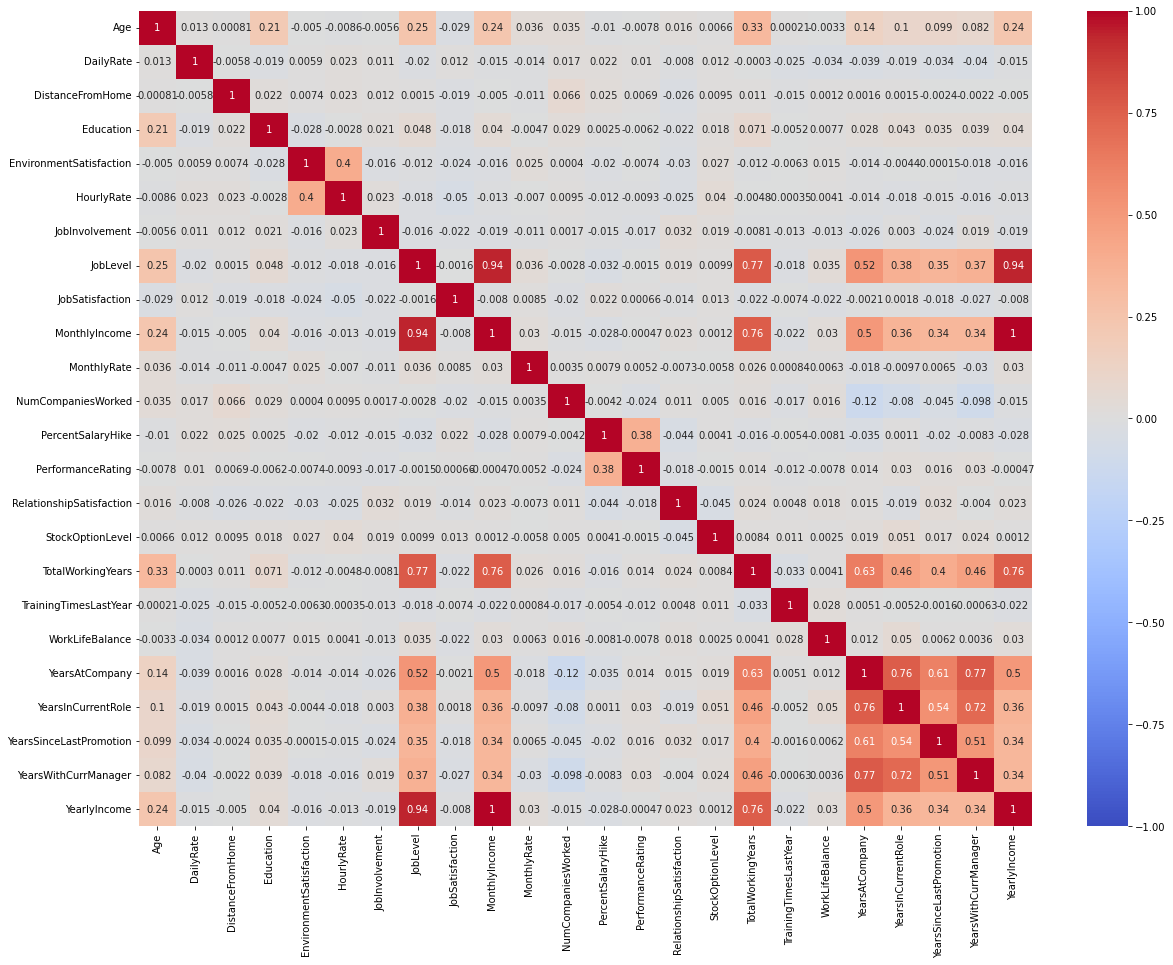

In [64]:
# Calculate correlation matrix

# lets first drop 'Over18' features as there are no data points for it
corr_matrix_numerics_df = ibm_df.drop('Over18', axis = 1)

# get all numeric data types
corr_matrix_numerics_df = corr_matrix_numerics_df.select_dtypes(include = ['float64', 'int64'])
corr_matrix = corr_matrix_numerics_df.corr()

# Set figure size
plt.figure(figsize=(20, 15))

# Create heatmap

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show plot
plt.show()

From the heatmap above, we can see that we have some possible multicollinearity between features such as TotalWorkingYears and JobLevel, MonthlyIncome and TotalWorkingYears, etc. We will take this into account when modeling.

## Impact of Individual Features on Attrition

Visualizing the effect of various attributes on a goal variable, such as attrition, is a crucial stage in the exploratory data analysis (EDA) process. This can direct further investigation and assist determine which characteristics are most crucial in predicting attrition.

One could start this process by determining which dataset variables, such as job satisfaction, income, and length of employment, are most likely to be important to attrition. After that, several visualization strategies can be utilized to investigate the connection between each of these factors and attrition. Scatter plots, for instance, can be used to show the relationship between two continuous variables, such as attrition and salary.

#### Education Level

Across all educational tiers, it is consistent that the number of presently employed individuals significantly surpasses the count of those who have voluntarily resigned from their positions. This trend is particularly pronounced among individuals who have attained a Level 3.0 education. The data clearly underscores the importance of understanding the role of educational attainment in workforce stability and employee retention, as well as its potential impact on organizational success and growth.

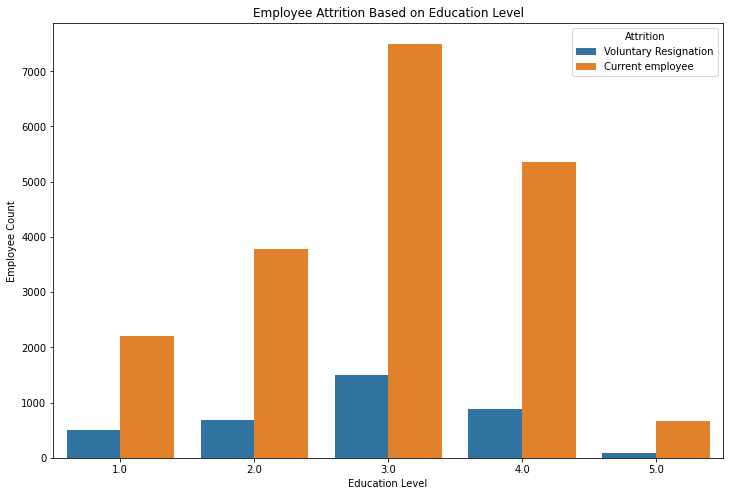

In [65]:
# interested in attrition of employees based on education 
plt.figure(figsize=(12,8))
sns.countplot(x = 'Education', hue='Attrition', data = ibm_df)
plt.title('Employee Attrition Based on Education Level')
plt.xlabel('Education Level')
plt.ylabel('Employee Count')
plt.show()

#### Job Involvement

In every level of job involvement, a greater number of individuals are opting to maintain their current employment status rather than voluntarily departing from their positions. This is particularly evident among those with a Level 3.0 job involvement. These findings highlight the crucial role that job engagement plays in workforce sustainability and employee retention, as well as its possible influence on the overall success, productivity, and growth of organizations.

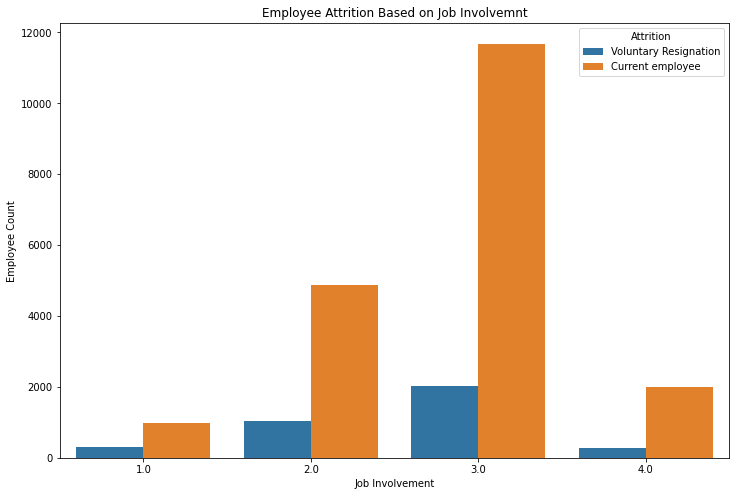

In [66]:
# attrition of employees based on JobInvolvement
plt.figure(figsize=(12,8))
sns.countplot(x = 'JobInvolvement', hue='Attrition', data = ibm_df)
plt.title('Employee Attrition Based on Job Involvemnt')
plt.xlabel('Job Involvement')
plt.ylabel('Employee Count')
plt.show()

#### Age

The distribution patterns of both voluntarily resigned and currently employed individuals appear to share striking similarities, with the most substantial representation concentrated within the 25-40 age bracket. This noteworthy parallelism between the two groups emphasizes the significance of understanding the unique factors and circumstances influencing the workforce dynamics within this specific age range, potentially offering valuable insights into the underlying motivations and decision-making processes affecting employee retention and career transitions.

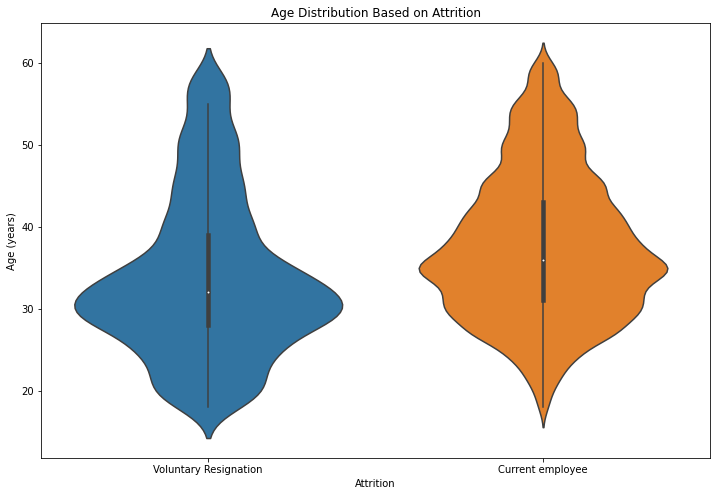

In [67]:
plt.figure(figsize=(12, 8))
sns.violinplot(x="Attrition", y='Age', data=ibm_df)
plt.title("Age Distribution Based on Attrition")
plt.xlabel('Attrition')
plt.ylabel('Age (years)')
plt.show()

## Interesting Analysis

### Factors Affecting Income

#### Gender and Job Role

One objective of ours was to analyze the correlation between Job Role and Gender in relation to Yearly Income. The most pronounced disparity in compensation was observed within the **Manager and Research Director positions**, where Males received higher compensation compared to their Female counterparts. 

When considering the similarities in both average yearly incomes and standard deviations across all job roles, it can be concluded *(at least according to this dataset)* that there is no substantial discrepancy in salary between Male and Female employees, regardless of their respective Job Roles. Nonetheless, there existing any discrepancy at all at any level highlights the importance of promoting fair compensation practices and fostering an equitable workplace environment for all employees.

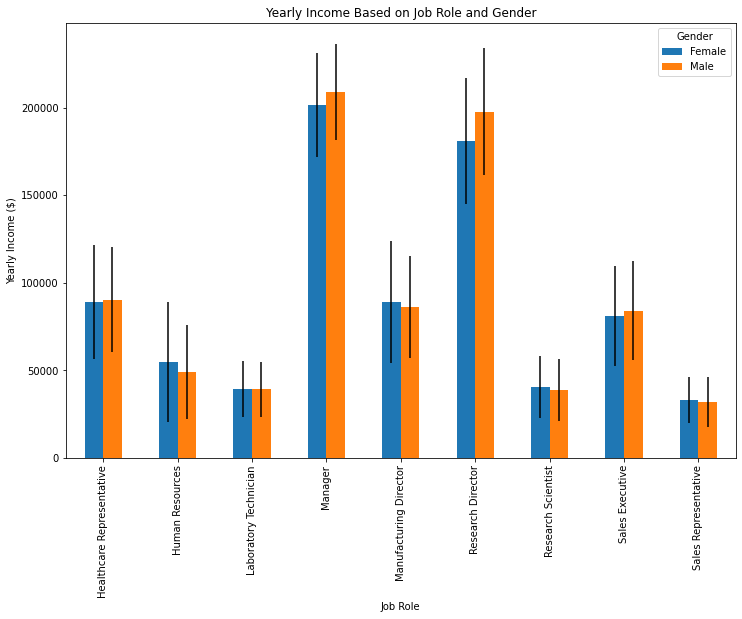

In [68]:
# yearly income based on job role and gender
income_df = ibm_df.groupby(['JobRole', 'Gender'])['YearlyIncome'].agg(['mean', 'std']).reset_index()
income_df = income_df.rename({'mean':'Average Yearly Income'}, axis = 1)
pv_income_df = pd.pivot_table(income_df, values=['Average Yearly Income', 'std'], index='JobRole', columns='Gender')
figure, axis  = plt.subplots(figsize=(12,8))
pv_income_df.plot(kind = 'bar', y='Average Yearly Income', yerr='std', ax =axis)
axis.set_title("Yearly Income Based on Job Role and Gender")
axis.set_xlabel('Job Role')
axis.set_ylabel('Yearly Income ($)')
plt.show()

#### Years at Company by Department

Utilizing the figure below, it becomes evident that there is a discernible positive correlation between yearly income and employee tenure within each department. As the duration of an employee's employment within the organization expands, so does their yearly income. This trend relates to the value of retaining experienced personnel and highlights the potential rewards that come with long-term commitment and loyalty to the organization, across all departments.

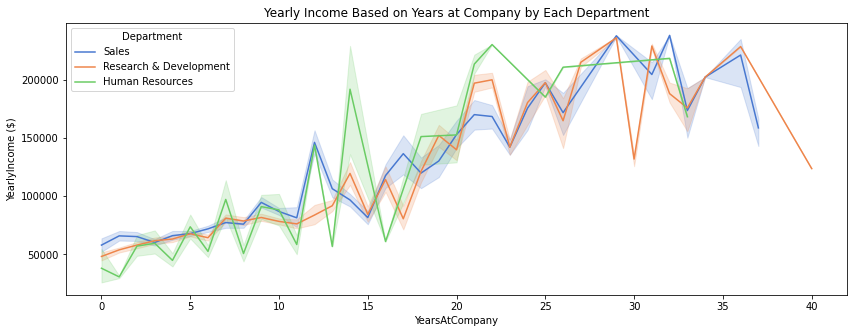

In [69]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=ibm_df, x='YearsAtCompany', y='YearlyIncome', hue='Department', palette='muted')
plt.title("Yearly Income Based on Years at Company by Each Department")
plt.ylabel("YearlyIncome ($)")
plt.show()

### Lucrative Roles

#### Top 5 Highest Compensated Job Roles

Upon delving into the data, our analysis revealed that the five most lucratively compensated positions within the organization include Manager, Research Director, Healthcare Representative, Manufacturing Director, and Sales Executive. It comes as no surprise that roles bearing designations such as "manager," "director," and "executive" are among the highest-earning, as these titles typically denote elevated levels of responsibility, authority, and expertise, warranting substantial compensation and bonus packages.

In [70]:
# top job roles based on income
jobrole_incomes_df = ibm_df.groupby(['JobRole'], as_index=False)['YearlyIncome'].mean()
jobrole_incomes_df = jobrole_incomes_df.sort_values(by = ['YearlyIncome'], ascending = False)
jobrole_incomes_df = jobrole_incomes_df.head(5).rename({'YearlyIncome':'Average Income (Yearly)'}, axis = 1)
jobrole_incomes_df

JobRole 
 Average Income (Yearly) 
 
 
 
 
 3 
 Manager 
 205679.901577 
 
 
 5 
 Research Director 
 190835.325527 
 
 
 0 
 Healthcare Representative 
 89908.358382 
 
 
 4 
 Manufacturing Director 
 87663.628971 
 
 
 7 
 Sales Executive 
 82933.976666

The plot depicted below illustrates that Managers and Research Directors exhibit comparable compensation levels, both being on the higher end of the pay scale. Meanwhile, Healthcare Representatives, Manufacturing Directors, and Sales Executives, though receiving lower compensation compared to the aforementioned roles, display similar pay structures amongst themselves. This visual representation provides valuable insights into the organization's salary distribution and allows for further analysis of the factors contributing to these pay disparities.

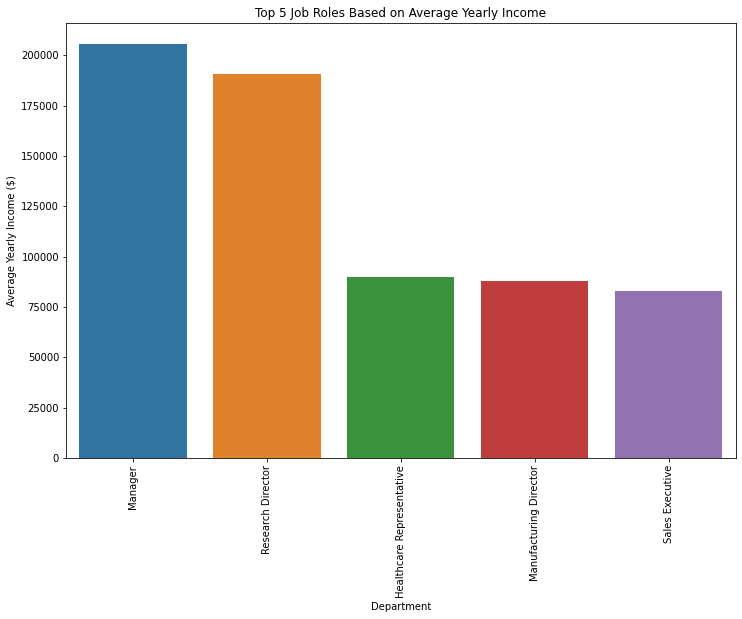

In [71]:
plt.figure(figsize=(12, 8))
sns.barplot(x='JobRole', y='Average Income (Yearly)', data = jobrole_incomes_df)
plt.xlabel('Department')
plt.ylabel('Average Yearly Income ($)')
plt.title('Top 5 Job Roles Based on Average Yearly Income')
plt.xticks(rotation=90)
plt.show()

In [72]:
top5_roles = jobrole_incomes_df['JobRole'].tolist()
top5_df = ibm_df[ibm_df['JobRole'].isin(top5_roles)]
not_top_df = ibm_df[~ibm_df['JobRole'].isin(top5_roles)]
top5_attrition = (top5_df['Attrition'].apply(lambda x: 1 if x == 'Voluntary Resignation' else 0).sum())/(len(top5_df))
not_top5_attrition =(not_top_df['Attrition'].apply(lambda x: 1 if x == 'Voluntary Resignation' else 0).sum())/(len(not_top_df))

#### Attrition rates of top 5 highest paid jobs vs. others

The attrition rate observed among the top five highest-paid job roles is lower than that seen among the remaining roles within the organization. This finding suggests that employees in more lucrative positions may be more likely to stay with the company, potentially due to the higher compensation, increased job satisfaction, or greater opportunities for growth and development. This insight offers a valuable perspective for organizations seeking to improve employee retention and maintain a stable, committed workforce.

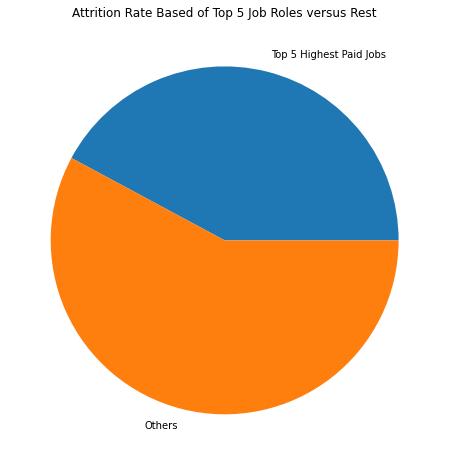

In [73]:
plt.figure(figsize=(12, 8))
plt.pie([top5_attrition, not_top5_attrition], labels = ['Top 5 Highest Paid Jobs', 'Others'])
plt.title('Attrition Rate Based of Top 5 Job Roles versus Rest')
plt.show()

In [74]:
job_satisfaction_top5 = top5_df['JobSatisfaction'].mean()
job_satisfaction_not_top5 = not_top_df['JobSatisfaction'].mean()


job_satisfaction_top5

2.732200647249191

#### Job Satisfaction rates of top 5 highest paid jobs vs. others

Another noteworthy observation is that the job satisfaction levels reported by employees in the top five highest-paid roles are equivalent to those of employees in the remaining positions. This finding implies that factors beyond monetary compensation, such as work-life balance, organizational culture, and personal fulfillment, may play a significant role in determining overall job satisfaction. It highlights the importance of considering a comprehensive approach to employee well-being that extends beyond financial rewards in order to foster a content and engaged workforce.

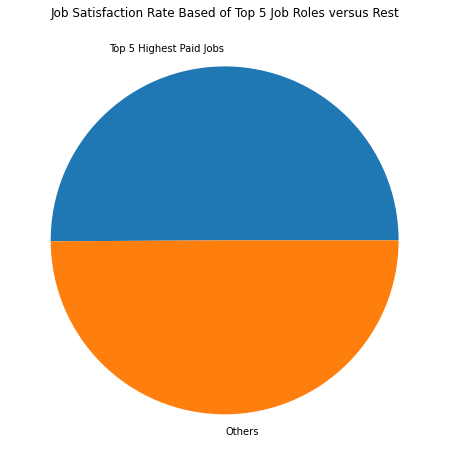

In [75]:
plt.figure(figsize=(12, 8))
plt.pie([job_satisfaction_top5, job_satisfaction_not_top5], labels = ['Top 5 Highest Paid Jobs', 'Others'])
plt.title('Job Satisfaction Rate Based of Top 5 Job Roles versus Rest') 
plt.show()

### Geographic Impacts

#### Distance From Home and Job Satisfaction by Age and the Impact on Attrition (Interactive)

In this plot, we explore the relationship between distance from home, job satisfaction, and age. We are using Plotly, which is an interactive data visualization library in Python. Plotly provides a variety of interactive graphs, including geographic maps, which are perfect for visualizing data with a geographic impact. 

The plot displays the distance from home on the y-axis, with age groups on the x-axis, grouped by attrition. The purpose of this plot is to investigate whether there is a correlation between distance from home, age, job satisfaction, age and its impact on attrition. The plot can help us identify if there are any age groups or a range of distance from home that are associated with higher or lower job satisfaction/attrition.

In [76]:
fig = px.scatter(ibm_df, x='Age', y='DistanceFromHome', color='Attrition', size='JobSatisfaction', hover_data = ['JobSatisfaction'], width=1100, height=800)
fig.update_traces(marker=dict(size=10))
fig.update_layout(title={
    'text': 'Distance From Home and Job Satisfaction by Age and the Impact on Attrition',
    'xanchor': 'center',
    'yanchor': 'top',
    'x':0.45

})
fig.show()

#### Distribution of Distance From Home and Attrition By Gender

The data suggests that both male and female employees residing at a greater distance from their workplace exhibit a higher propensity to resign. The box plot illustrates that current employees generally live closer to work, and importantly, there is no significant difference in this aspect between male and female employees. This finding emphasizes the role that commuting distance can play in employee retention and underscores the need for organizations to consider factors such as location, remote work opportunities, and flexible work arrangements in order to maintain a stable and satisfied workforce.

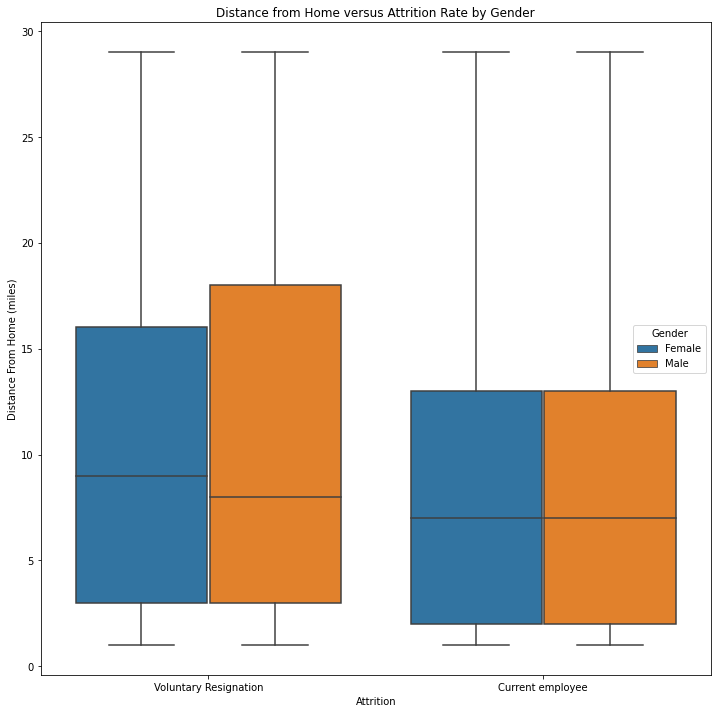

In [77]:
figure, axis = plt.subplots(figsize=(12, 12))
plt.title('Distance from Home versus Attrition Rate by Gender') 
sns.boxplot(x='Attrition', y='DistanceFromHome', hue='Gender', ax=axis, data=ibm_df)
axis.set_ylabel("Distance From Home (miles)")
plt.show()

### Pair Plot

In the previous visualizations, we have seen the relationship among only a few variables. However, when working with a dataset with many variables, pairplots are very helpful since they let us rapidly observe how multiple variables are connected to one another. Based on this, we can observe multiple variables at once, that may have a correlation with attrition.

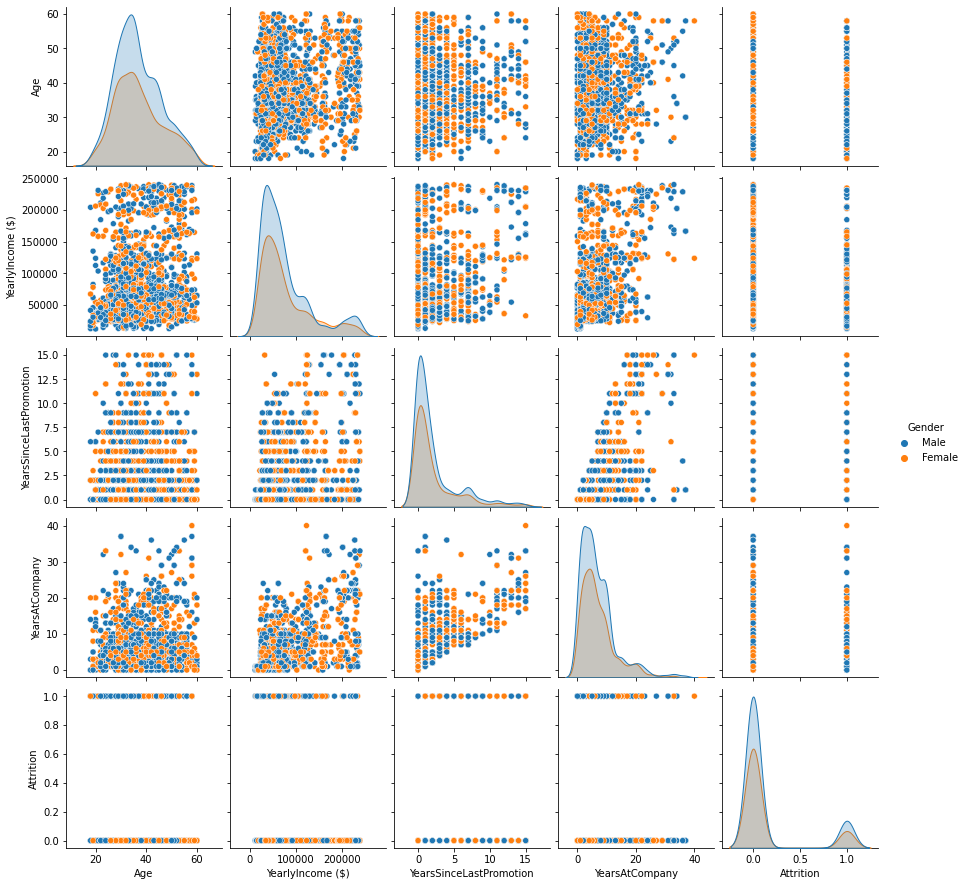

In [78]:
temp = ibm_df.copy()
temp['Attrition'] = temp['Attrition'].map({'Voluntary Resignation':1,
                                               'Current employee':0 })
# randomize the 3k rows to avoid bias 
random_rows = random.sample(range(temp.shape[0]), 3000)
random_data = temp.iloc[random_rows]
random_data = random_data.rename(columns={'YearlyIncome':'YearlyIncome ($)'})

variables = ["Age", "YearlyIncome ($)", 'YearsSinceLastPromotion', 'YearsAtCompany', 'Gender', 'Attrition']
sns.pairplot(data=random_data[variables], hue="Gender")
plt.show()

# Modeling

Prior to modeling, we must encode the target variable (Attrition) and resolve any class imbalance. Afterwards, the balanced dataset is scaled using StandardScaler from sklearn. PCA is then used to reduce the dimensionality of the dataset. Three models - logistic regression, random forest, and gradient boosting, are selected for GridSearch tuning, and GridsearchCV from sklearn is used to tune their hyperparameters. The models are then evaluated based on their respective performance metrics. Additionally, a feedforward NN is built using TensorFlow to apply a deep learning approach, and the model is evaluated. Finally, the performance of all the models is compared, and a final interpretation is made based on the best-performing model.

<img src="https://capital-placement.b-cdn.net/wp-content/uploads/2020/12/career-development.png.webp"
     align="center" 
     width="1000" />

We first encode our target variable, then tackle any class imbalance.  

In [79]:
# Map the "Attrition" column to a binary variable
ibm_df.drop(['YearlyIncome','Over18'],axis=1,inplace=True)
ibm_df['Attrition'] = ibm_df['Attrition'].map({'Voluntary Resignation':1,
                                               'Current employee':0 })

In [80]:
ibm_df['Attrition']

0 1
1 1
2 1
3 1
4 1
 ..
23428 0
23429 0
23430 0
23431 0
23432 0
Name: Attrition, Length: 23189, dtype: int64

Below, we notice that our dataset is imbalanced when it comes to our target column. This can lead to the models over-fitting on the most common class of the data and thus not having a good accuracy.

In [81]:
print("Number of people that are current employees (0) vs voluntarily left (1) \n")
print(ibm_df['Attrition'].value_counts())

Number of people that are current employees (0) vs voluntarily left (1) 

0    19526
1     3663
Name: Attrition, dtype: int64


In [82]:
from sklearn.utils import resample

In order to counteract this, we will over-sample the number of samples with attrition set to 1 so that they meet the number of samples present in the other class. We will use Sklearn's built-in resample method.

In [83]:
ibm_majority = ibm_df[ibm_df.Attrition==0] #Current Employees
ibm_minority = ibm_df[ibm_df.Attrition==1] # Voluntarily Resigned Employees

# Upsample the minority class to match the count of the majority class
ibm_minority_upsampled = resample(ibm_minority,
                                 replace=True,
                                 n_samples=ibm_majority.shape[0],
                                 random_state=42)

# Combine the upsampled minority class with the majority class
ibm_df = pd.concat([ibm_majority, ibm_minority_upsampled])

Now we have a balanced dataset that we can model from.

In [84]:
print("Number of people that are current employees (0) vs voluntarily left (1) \n")
print(ibm_df.Attrition.value_counts())

Number of people that are current employees (0) vs voluntarily left (1) 

0    19526
1    19526
Name: Attrition, dtype: int64


We will initialize a dictionary called dictMap, which will store mappings between categorical feature names and their corresponding integer codes. The goal is to encode the categorical features in the IBM dataset so that they can be used as input for machine learning models that only accept numerical data.

In [85]:

# Initialize dictMap, which will store our mappings
# For predicting attrition, we can use dictMap[str: feature] instead of str: feature to encode them 
dictMap = {}

# For each column in the DataFrame
for col in ibm_df.columns:
    # Skip the "Attrition" column
    if col == 'Attrition':
        continue
    # If the data type of the column is "object"
    elif ibm_df[col].dtype == object:
        # Print the name of the column as well as its unique values
        print('col name: ', col, 'vals: ', ibm_df[col].unique())
        # Create a dictionary mapping each unique value to an integer
        dic = {val:i for i, val in enumerate(ibm_df[col].unique())}
        # Map the values in the column to their corresponding integers
        ibm_df[col] = ibm_df[col].map(dic)
        # Finally, add the mapping to the dictMap dictionary
        dictMap[col] = dic

col name:  BusinessTravel vals:  ['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
col name:  Department vals:  ['Human Resources' 'Sales' 'Research & Development']
col name:  EducationField vals:  ['Human Resources' 'Medical' 'Life Sciences' 'Marketing' 'Other'
 'Technical Degree']
col name:  Gender vals:  ['Female' 'Male']
col name:  JobRole vals:  ['Laboratory Technician' 'Manufacturing Director' 'Research Scientist'
 'Manager' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Human Resources' 'Research Director']
col name:  MaritalStatus vals:  ['Married' 'Divorced' 'Single']
col name:  OverTime vals:  ['Yes' 'No']


Now we are taking all the columns that were numerical from the start and scaling them so that no one feature dominates the models' parameters while training. This should lead to a more robust and generalizable model.

In [86]:
# Select only the columns with numerical data types
encoded_cols = dictMap.keys()
# Scale the selected columns
cols_to_scale = [col for col in ibm_df.columns if col not in encoded_cols and col != 'Attrition']
scaler = StandardScaler()
scaler.fit(ibm_df[cols_to_scale])
scaled_num_cols = scaler.transform(ibm_df[cols_to_scale])

# Create a new DataFrame with the scaled numerical columns
ibm_scaled_df = ibm_df.copy()
ibm_scaled_df[cols_to_scale] = scaled_num_cols

In [87]:
#Necessary ML imports from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import *
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import NotFittedError
from sklearn.decomposition import PCA

We are now creating our feature and target variables, X and y respectively. We then take these vectors and pass them through Sklearn's train test split, so that we can get a training partition of 80% and testing of 20%. Later down the line, we will use 5 fold cross-validation so that training partition would, in practice, actually be 64% of the entire dataset. 

In [88]:
X = ibm_scaled_df.drop(['Attrition'],axis=1)
y = ibm_scaled_df.Attrition
X_train,X_test,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Now we are going to run PCA and utilize the 'elbow method' in order to see what is the optimal number of components that we should use.

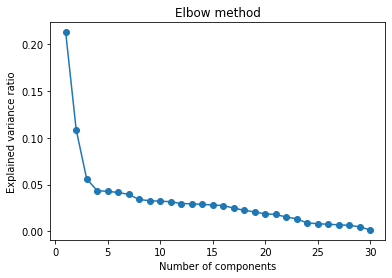

In [89]:
# Initialize the PCA with a maximum number of components
pca = PCA(n_components=X_train.shape[1])

# Fit the PCA and extract the explained variance ratio for each component
pca.fit(X_train)
explained_var_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio for each component
plt.plot(np.arange(1, len(explained_var_ratio) + 1), explained_var_ratio, 'o-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Elbow method')
plt.show()

Based off the graph, the optimal number of components (designated by the elbow) would be around 4. Therefore, going forward, we will set n_components = 4 and we will transform both our X_train and X_test.

In [90]:
pca = PCA(n_components=4)
pca.fit(X_train)
# Fit the PCA and extract the explained variance ratio for each component
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

We will now visualize the feature weights as they pertain to each principal component. This may help us understand the most critical features. 

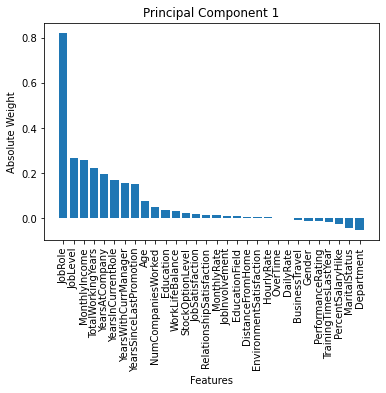

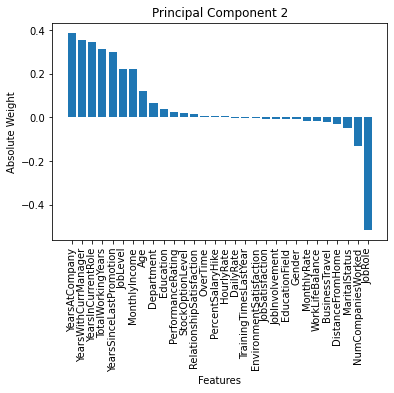

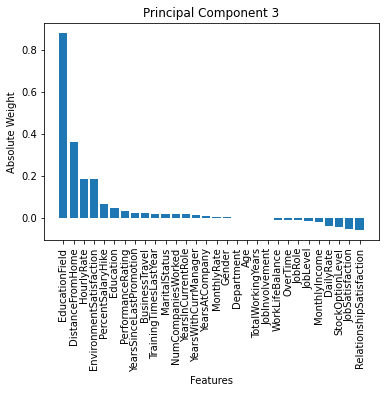

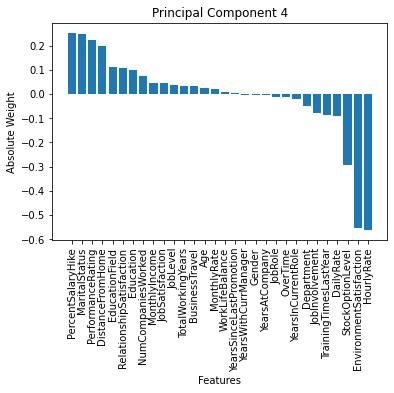

In [91]:
for i, component in enumerate(pca.components_):
    feature_weights = pd.DataFrame({'feature': X_train.columns, 'weight': component})
    feature_weights = feature_weights.sort_values('weight', ascending=False)
    plt.bar(feature_weights['feature'], feature_weights['weight'])
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Absolute Weight')
    plt.title(f'Principal Component {i+1}')
    plt.show()

In this section, we are setting up our machine learning pipelines with the default algorithms for each model. Since we have already scaled the data beforehand, we do not need to include the standard scaler in the pipelines.

In [92]:
modelMap = {
    'lr': make_pipeline(LogisticRegression(random_state=42)),
    'rf': make_pipeline(RandomForestClassifier(random_state=42)),
    'gb': make_pipeline(GradientBoostingClassifier(random_state=42))
}

In [93]:
"""
This is our hyperparameter map that we will feed into our GridSearch to tune our models. We attempted to use a variety of different
hyperparameters during this model so that we could maximize our models predictive capabilities. Noted, that for Logistic Regression,
some of the solvers are not compatible with some of the penalties but that is ok as we are just not going to fit those models in
the grid search.
"""
hypermap = {
    'lr': {
        'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear'],
        'logisticregression__penalty' : ['none', "l1", "l2", "elasticnet"],
        'logisticregression__C': [100, 10, 1.0, 0.1, 0.01]
    },
    'rf':{
        'randomforestclassifier__n_estimators' : [10, 100, 1000],
        'randomforestclassifier__max_features' : ['sqrt', 'log2']
    },
    'gb':{
        'gradientboostingclassifier__n_estimators' : [10, 100, 1000],
        'gradientboostingclassifier__learning_rate' : [0.1,0.01,0.001]
    }
}

### Training loop for the 3 models

In [94]:
# Necessary import to save models
import joblib

In [95]:
# This is so that if we ran this notebook again, we would not have to train the models
try:
    lr,rf,gb = joblib.load('lr.pkl'),joblib.load('rf.pkl'),joblib.load('gb.pkl')
except FileNotFoundError as fe:
    lr=rf=gb=None

In this code section, we first check whether pre-trained models exist. If they do, we skip the training step and store them in a dictionary called 'optimized_models'. If not, we loop through each algorithm in our model map and run GridSearchCV on all of the hyperparameters specified in the 'hypermap' dictionary. We utilize 5-fold cross-validation and set n_jobs to -1 to utilize all available processing power. It should be noted that we attempted to train an SVC model, but training and running cross-validation on it proved time-intensive, so we excluded it from the model map. Once the models are trained and optimized, we store them in the 'optimized_models' dictionary.

In [96]:
if not (lr or rf or gb):
    optimized_models = {}
    for algo_name, algo_pipeline in modelMap.items():
    
        print(f'training {algo_name}')
        try:
            model = GridSearchCV(algo_pipeline,hypermap[algo_name],cv = 5, n_jobs = -1)
            model.fit(X_train_pca, y_train)
            optimized_models[algo_name] = model
        except NotFittedError as e:
            print(repr(e))
        except ValueError as v:
            print(repr(v))
    print('Done training')
    #saving our models model or results
    joblib.dump(optimized_models['lr'], 'lr.pkl')
    joblib.dump(optimized_models['rf'], 'rf.pkl')
    joblib.dump(optimized_models['gb'], 'gb.pkl')
else:
    optimized_models = {}
    optimized_models['lr'] = lr
    optimized_models['rf'] = rf
    optimized_models['gb'] = gb

training lr
training rf
training gb
Done training


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/python/envs/default/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/python/envs/default/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver 

## Model evaluation

For this step in the process, we analyze our models' performance. We can see that out of all trained models, our Random Forest performed the best on the testing data, having the highest accuracy of 91.8%. Therefore, we will consider this the best model and show results as it relates to our best model.

In [97]:
ypredslr = optimized_models['lr'].predict(X_test_pca)
ypredsrf = optimized_models['rf'].predict(X_test_pca)
ypredsgb = optimized_models['gb'].predict(X_test_pca)
print(f"Logistic Regression Test Accuracy {accuracy_score(y_test,ypredslr)}")
print(f"Random Forest Test Accuracy {accuracy_score(y_test,ypredsrf)}")
print(f"Gradient Boosting Test Accuracy {accuracy_score(y_test,ypredsgb)}")

Logistic Regression Test Accuracy 0.5640763026501088
Random Forest Test Accuracy 0.9984637050313661
Gradient Boosting Test Accuracy 0.9048777365254129


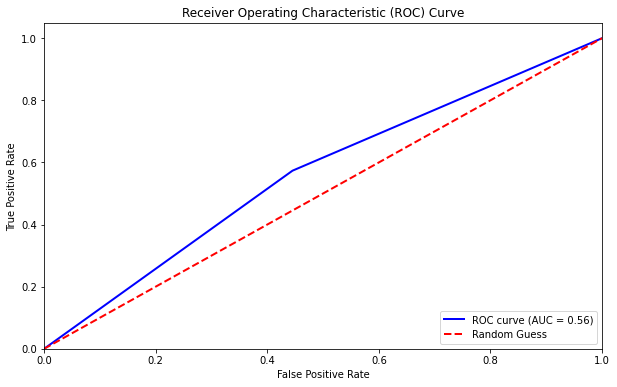

In [98]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_true: true labels, y_score: predicted scores (probability of positive class)
fpr, tpr, _ = roc_curve(y_test,ypredslr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

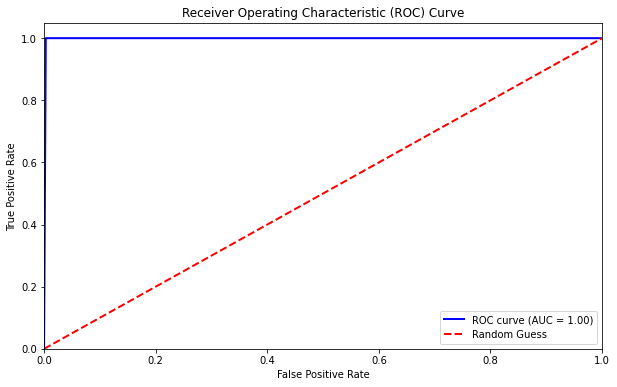

In [99]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_true: true labels, y_score: predicted scores (probability of positive class)
fpr, tpr, _ = roc_curve(y_test,ypredsrf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

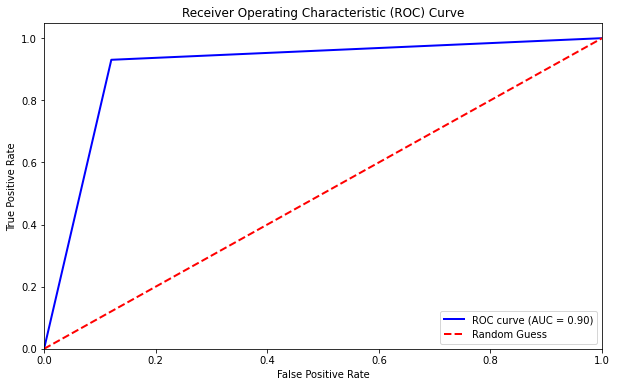

In [100]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_true: true labels, y_score: predicted scores (probability of positive class)
fpr, tpr, _ = roc_curve(y_test,ypredsgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Below, we want to see what were the best parameters for each model and view their confusion matrix. We see that the Random Forest Classifier outperforms the others.

In [101]:
optimized_models['lr'].best_estimator_

Pipeline(steps=[('logisticregression',
                 LogisticRegression(C=100, penalty='none', random_state=42,
                                    solver='newton-cg'))])

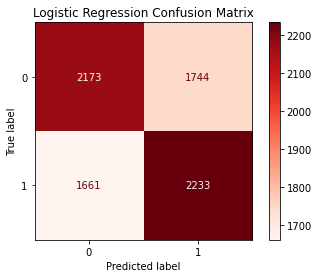

In [102]:
lrdisp = ConfusionMatrixDisplay.from_estimator(
        optimized_models['lr'],
        X_test_pca,
        y_test,
        cmap=plt.cm.Reds
)
lrdisp.ax_.set_title('Logistic Regression Confusion Matrix')
plt.show()      

In [103]:
optimized_models['rf'].best_estimator_

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_features='sqrt', n_estimators=1000,
                                        random_state=42))])

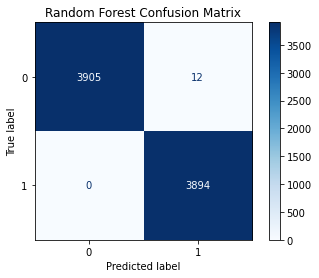

In [104]:
rfdisp = ConfusionMatrixDisplay.from_estimator(
        optimized_models['rf'],
        X_test_pca,
        y_test,
        cmap=plt.cm.Blues
)
rfdisp.ax_.set_title('Random Forest Confusion Matrix')
plt.show()      

In [105]:
optimized_models['gb'].best_estimator_

Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(n_estimators=1000,
                                            random_state=42))])

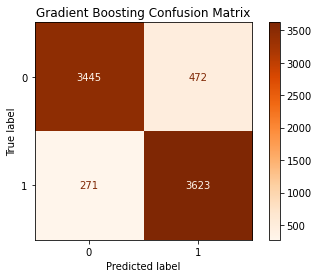

In [106]:
gbdisp = ConfusionMatrixDisplay.from_estimator(
        optimized_models['gb'],
        X_test_pca,
        y_test,
        cmap=plt.cm.Oranges
)
gbdisp.ax_.set_title('Gradient Boosting Confusion Matrix')
plt.show()      

Perhaps one of the best parts of using tree-based models is their ease of interpretability. This allows us to extract the factors and below are the numerical and plotted results.

In [107]:
rfModel = optimized_models['rf'].best_estimator_.named_steps['randomforestclassifier']
rfModel

RandomForestClassifier(max_features='sqrt', n_estimators=1000, random_state=42)

Let's see the importance of each feature in our Random Forest model, which can be useful for feature selection and identifying the most relevant variables for the model's performance.

In [108]:
importances = rfModel.feature_importances_
for feature, importance in zip(range(1,len(importances)+1) ,importances):
    print(f"{feature}: {importance}")

1: 0.27646336107411573
2: 0.2601369032989945
3: 0.2302155938044283
4: 0.23318414182246144


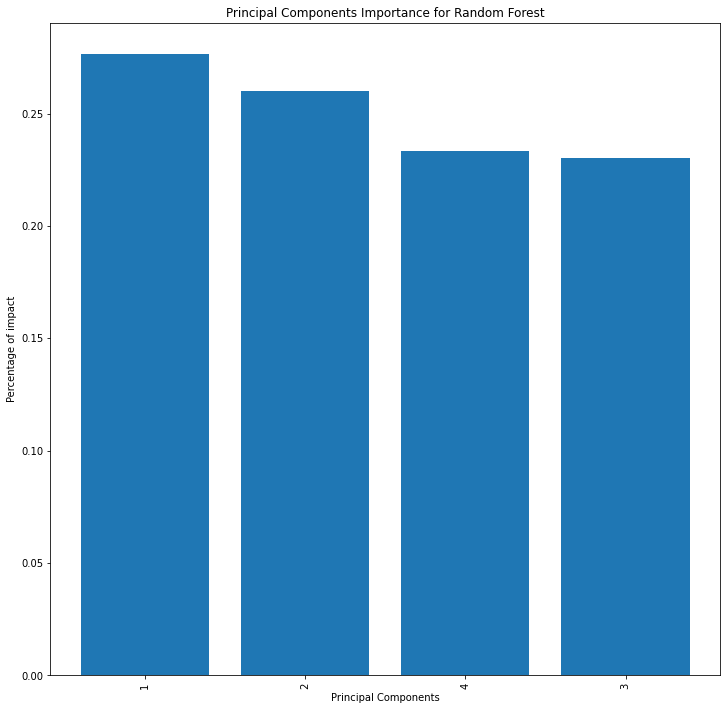

In [109]:
idxs = importances.argsort()[::-1]
feats = [i+1 for i in idxs]
plt.figure(figsize=(12, 12))
plt.bar(range(X_test_pca.shape[1]), importances[idxs])
plt.xticks(range(X_test_pca.shape[1]), feats, rotation=90)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of impact')
plt.title('Principal Components Importance for Random Forest')
plt.show()

## Deep Learning

We also want to consider deep learning for predicting attrition. 

In [110]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 520.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 18.1 MB/s eta 0:00:00
  Created wheel for jax: filename=jax-0.4.10-py3-none-any.whl size=1480503 sha256=24ef3a4f58b9e3aec97c68cc873da9eb

Below, we will attempt to use a neural network for classification. 

In [111]:
import tensorflow as tf

Here is a simple Feed Forward neural net. With a sigmoid in the output layer for binary classification. Through trial and error, we decided to use 4 hidden layers. In the beginning, we also had dropout to try and reduce over-fitting. However, it was working against us, and therefore our train and test accuracies had a big difference (test was higher that train and the model was under-fitting). So we removed those and just left the network as is below.

In [112]:
# This is so that if we ran this notebook again, we would not have to train the models
try:
    model = joblib.load('FFNN.pkl')
    history = joblib.load('History.pkl')
except FileNotFoundError as fe:
    model=None

In [113]:
X_train_pca

array([[-1.82982377, -0.60962055, -0.64674377, 0.08984103],
 [-1.16353131, 2.37051341, -2.48782113, 2.93296492],
 [-2.64684965, 1.37703679, 0.4948948 , -0.58478744],
 ...,
 [ 2.09016026, -1.08200033, -1.56471038, 1.53985293],
 [-1.73008051, 0.09350813, 0.18779429, -2.26964739],
 [ 0.64248321, 6.39188463, -0.05509116, 0.16214743]])

We create a fully connected neural network model using the Keras Sequential API, with 5 dense layers, ReLU and sigmoid activation functions, Adam optimizer, and binary crossentropy loss. If the model is not defined, it defines the input shape, compiles and fits the model on the training data for 50 epochs, saves the training history, and saves the trained model using joblib.dump function in the file named 'FFNN.pkl'.

In [114]:
if not model:
    # Define the input shape
    input_shape = (4,)

    # Define the model architecture
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_pca,y_train,epochs=50,validation_data=(X_test_pca, y_test))
    joblib.dump(model, 'FFNN.pkl')
    joblib.dump(history, 'History.pkl')

Epoch 1/50
977/977 [==============================] - 4s 2ms/step - loss: 0.6616 - accuracy: 0.5910 - val_loss: 0.6576 - val_accuracy: 0.6013
Epoch 2/50
977/977 [==============================] - 2s 2ms/step - loss: 0.6467 - accuracy: 0.6136 - val_loss: 0.6448 - val_accuracy: 0.6180
Epoch 3/50
977/977 [==============================] - 2s 2ms/step - loss: 0.6333 - accuracy: 0.6312 - val_loss: 0.6320 - val_accuracy: 0.6414
Epoch 4/50
977/977 [==============================] - 2s 2ms/step - loss: 0.6212 - accuracy: 0.6439 - val_loss: 0.6181 - val_accuracy: 0.6538
Epoch 5/50
977/977 [==============================] - 2s 2ms/step - loss: 0.6067 - accuracy: 0.6570 - val_loss: 0.6055 - val_accuracy: 0.6582
Epoch 6/50
977/977 [==============================] - 2s 2ms/step - loss: 0.5899 - accuracy: 0.6725 - val_loss: 0.5915 - val_accuracy: 0.6652
Epoch 7/50
977/977 [==============================] - 2s 2ms/step - loss: 0.5770 - accuracy: 0.6825 - val_loss: 0.5886 - val_accuracy: 0.6710
Epoch 

In [115]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,313
Trainable params: 13,313
Non-trainable params: 0
_________________________________________________________________


We plot the training and validation accuracy of the deep learning model over epochs. 

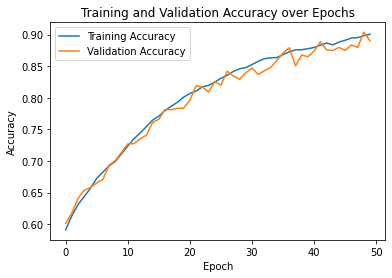

In [116]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

In [117]:
pred = model.predict(X_test_pca)
binary_predictions = (pred > 0.5).astype(int)
acc = accuracy_score(binary_predictions,y_test)
print(f'Nerual Net testing accuracy: {acc}')

245/245 [==============================] - 0s 1ms/step
Nerual Net testing accuracy: 0.890026885161951


Here is a confusion matrix for the neural net. We can see that this model surprisingly doesn't do as well as the Random Forest. In order to improve it, we could possibly train for more epochs and increase the size of the model. However, we need to be aware that when doing so could cause over-fitting.

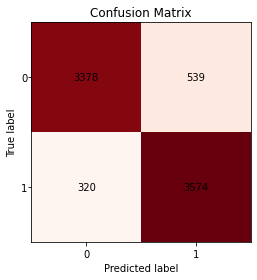

In [118]:
cm = confusion_matrix(y_test, binary_predictions)

# Display the confusion matrix as a heatmap
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['0', '1'], yticklabels=['0', '1'],
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), ha="center", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), ha="center", rotation_mode="anchor")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="black")
fig.tight_layout()
plt.show()

# Interpretation of Results and Future Implications

<img src="https://img.freepik.com/free-vector/vector-cartoon-illustration-bright-office-modern-workplace-with-transparent-glass-wall-tile_33099-1195.jpg?w=2000&t=st=1682531471~exp=1682532071~hmac=b3aaf507d2f4146be2225c8dcb9f2472795e5ce83352ae1a4c5b62e19801706e"
     align="center" 
     width="1000" />

In summary, our analysis aimed to understand employee attrition, job satisfaction, and compensation based on various factors such as education, job involvement, age, job role, gender, and distance from home. This led us to many unique and interesting findings. We found that current employees have a higher count than those who voluntarily resigned across all levels of education and job involvement, with the highest difference observed at the 3.0 level. The age distribution of both groups was similar, with the majority falling in the 25-40 age category.

We also explored the impact of job role and gender on yearly income, finding no significant difference in compensation between male and female employees across various roles. The top 5 highest compensated roles were Manager, Research Director, Healthcare Representative, Manufacturing Director, and Sales Executive. The attrition rate among these 5 roles was lower than the rest, while job satisfaction was equivalent. Our analysis revealed that employees living further from work, regardless of gender, were more likely to resign. 

To address the imbalance in our dataset, we over-sampled voluntary resignations to match the number of current employee samples, helping to create a more accurate model. Utilizing PCA, GridSearchCV, Gradient Boosting, and a Feed-forward Neural Network, we found that the Random Forest model yielded the highest accuracy. Although we could not pinpoint overall specific feature importance in modeling due to the use of PCA, we could still analyze the principal components to understand the relative importance of features within those components. Our Random Forest model allowed us to predict the probability of an employee voluntarily resigning with 91.8% accuracy, which provides valuable insights for companies to proactively identify and address factors that may contribute to attrition. 

Companies can leverage the insights from this analysis to develop targeted retention strategies and improve overall employee satisfaction. By understanding the factors that contribute to attrition, organizations can proactively address these issues, such as offering flexible work arrangements for employees living further away or providing additional support to those in job roles associated with higher attrition rates. Identifying high-risk employees also allows companies to engage in timely and meaningful conversations with these individuals, ensuring they feel valued and addressing any concerns they may have which may help address problems before they arise.

Looking toward the future, this data-driven approach could be further enhanced by incorporating variables that may not usually be considered or quantified, such as work-life balance, company culture, and employee engagement, which can provide a more holistic view of the factors influencing employee satisfaction and retention. Companies can also apply machine learning algorithms to continuously monitor and update the predictive model as new data becomes available, *enabling them to stay ahead of potential workforce challenges*. By proactively addressing attrition risks, organizations can not only reduce employee turnover but also foster a more engaged and satisfied workforce, leading to higher productivity and a stronger competitive edge in the market!